# Web scraping on Flipkart and Amazon for "Redmi Note 8 Pro"

In [ ]:
from selenium import webdriver

In [ ]:
from webdriver_manager.chrome import ChromeDriverManager
browser = webdriver.Chrome(ChromeDriverManager().install())

C:\Users\HP\AppData\Local\Temp/ipykernel_16200/4089053854.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(ChromeDriverManager().install())


#### importing useful libraries

In [ ]:
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import time
from bs4 import BeautifulSoup
import re
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### Work Process: -
#####    1. Extracting information by selenium and beautifulsoup
#####    2. WordCloud
#####    3. CountVectorizer
#####    4. Gensim
#####    5. Sentiment Analysis
#####    6. Spacy

## Analysis on FlipKart

In [ ]:
f_rating = []
f_review = []
f_tagline = []
f_name = []
f_place = []
f_date = []

#### Extrating various information from flipkart (approx 500 reviews)

In [ ]:
for i in range(46,101):
    url = "https://www.flipkart.com/redmi-note-8-pro-electric-blue-64-gb/product-reviews/itm73a0543033be6?pid=MOBFN2HFYVG6PNVP&lid=LSTMOBFN2HFYVG6PNVPWSBJUE&aid=overall&certifiedBuyer=false&sortOrder=MOST_RECENT&page="+str(i)
    browser.get(url)
    containers = [x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH, "//div[@class='col _2wzgFH K0kLPL']")]
    
    for container in containers:
        bsObj = BeautifulSoup(container)
        name_extract = bsObj.find('div',{'class':"row _3n8db9"}).text
        review_extract = bsObj.find('div', attrs = {'class':'t-ZTKy'}).text
        review_extract = re.sub('READ MORE','', review_extract)
        rating_extract = bsObj.find('div',{'class':['_3LWZlK _1BLPMq','_3LWZlK _32lA32 _1BLPMq','_3LWZlK _1rdVr6 _1BLPMq']}).text
        tagline_extract = bsObj.find('p',{'class':'_2-N8zT'}).text
        unwanted = re.sub('Certified Buyer','', name_extract)
        unwanted = re.sub('PermalinkReport Abuse','', unwanted)
        name_final = re.findall("^[0-9A-Za-z ]+", unwanted)[0].strip()
        place_final = re.findall("(?<=, )[A-Z a-z ]+", unwanted)[0].strip()
        place_final = place_final[:-3]
        date_extract = re.findall("[A-Za-z]{3}, [0-9]{4}", name_extract)[0].strip()
        name_.append(name_final)
        place_.append(place_final)
        date_.append(date_extract)
        review_.append(review_extract)
        rating_.append(rating_extract)
        tagline_.append(tagline_extract)
        pass

In [ ]:
len(containers) # Length of the last container

10

In [ ]:
df_f = pd.DataFrame({'Comment Head':tagline_,'Rating':rating_,'Review':review_,'Name':name_,'Place':place_,
                  'Date':date_})

In [ ]:
#Saving Reviews to a csv
#df_f.to_csv("kushagra_flipkart.csv")

In [ ]:
df_f = pd.read_csv('kushagra_flipkart.csv')

In [ ]:
df_f.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_f.head()

Comment Head  Rating         Review                Name      Place  \
0         Nice       3        Not bad  suraj cuncoliencar  North Goa   
1    Brilliant       5  Good products   Flipkart Customer  New Delhi   
2    Just wow!       5    Super phone   Flipkart Customer     Guntur   
3    Just okay       3           Nice   Flipkart Customer  New Delhi   
4    Wonderful       4          Good👍   Flipkart Customer      Lonar   

        Date  
0  Nov, 2020  
1  Nov, 2020  
2  Nov, 2020  
3  Nov, 2020  
4  Nov, 2020

In [ ]:
df_f.tail()

Comment Head  Rating  \
533   Worth the money       4   
534    Simply awesome       5   
535         Just wow!       5   
536  Perfect product!       5   
537       Good choice       4   

                                                Review                Name  \
533                     Awesome product very satisfied           Raju Nath   
534                                               Nice       Pradeep Kumar   
535                                   Very nice👍 phone       Bharat  Singh   
536                                        Nice mobile     Ankit Chikanlar   
537  Nice but at this price there are more better p...  Venkatesh Belagapu   

            Place       Date  
533      Guwahati  Sep, 2020  
534     Berhampur  Sep, 2020  
535      Gurugram  Sep, 2020  
536        Nagpur  Sep, 2020  
537  Vizianagaram  Sep, 2020

In [ ]:
df_f.shape

(538, 6)

#### Checking for the duplication of any information

In [ ]:
duplicate = df_f[df_f.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Comment Head, Rating, Review, Name, Place, Date]
Index: []

#### Adding Redmi Note 8 Pro as Mobile name

In [ ]:
df_f['Mobile Name'] = 'Redmi Note 8 Pro'

In [ ]:
df_f.head()

Comment Head  Rating         Review                Name      Place  \
0         Nice       3        Not bad  suraj cuncoliencar  North Goa   
1    Brilliant       5  Good products   Flipkart Customer  New Delhi   
2    Just wow!       5    Super phone   Flipkart Customer     Guntur   
3    Just okay       3           Nice   Flipkart Customer  New Delhi   
4    Wonderful       4          Good👍   Flipkart Customer      Lonar   

        Date       Mobile Name  
0  Nov, 2020  Redmi Note 8 Pro  
1  Nov, 2020  Redmi Note 8 Pro  
2  Nov, 2020  Redmi Note 8 Pro  
3  Nov, 2020  Redmi Note 8 Pro  
4  Nov, 2020  Redmi Note 8 Pro

In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comment Head  538 non-null    object
 1   Rating        538 non-null    int64 
 2   Review        538 non-null    object
 3   Name          538 non-null    object
 4   Place         538 non-null    object
 5   Date          538 non-null    object
 6   Mobile Name   538 non-null    object
dtypes: int64(1), object(6)
memory usage: 29.5+ KB


In [ ]:
df_f.describe()

Rating
count  538.000000
mean     4.500000
std      0.865757
min      1.000000
25%      4.000000
50%      5.000000
75%      5.000000
max      5.000000

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

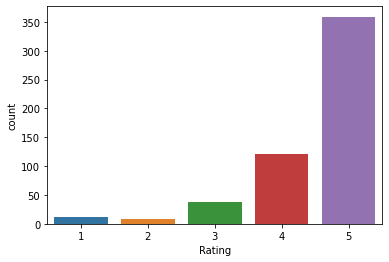

In [ ]:
sns.countplot(df_f['Rating'])

Redmi Note 8 Pro gets 5 star rating from maximum number of user.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


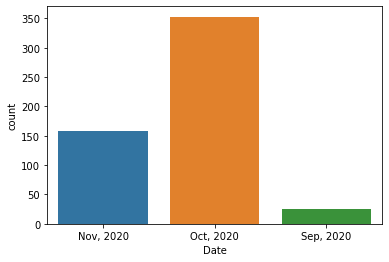

In [ ]:
monthly = sns.countplot(df_f['Date'])
#date_count.set_xticklabels(date_count.get_xticklabels(), rotation=80)
None

Looks like people used to buy Mobile during festive season as they get plenty of offers like Big Billion Days etc.

In [ ]:
df_f['Place'].value_counts()

Kolkata                18
Hyderabad              15
Bengaluru              10
New Delhi               9
Mumbai                  7
                       ..
Chhindwara              1
Madurai                 1
Thagarapuvalasa         1
Malkangiri District     1
Vizianagaram            1
Name: Place, Length: 384, dtype: int64

In [ ]:
df_f['Place'].nunique()

384

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


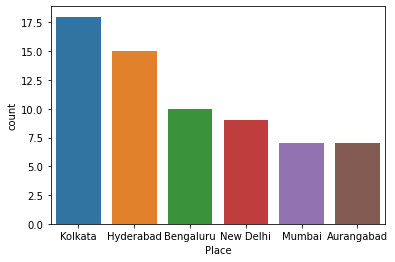

In [ ]:
sns.countplot(df_f['Place'],order=df_f.Place.value_counts().iloc[:6].index)
None

In [ ]:
df_f.isnull().sum()

Comment Head    0
Rating          0
Review          0
Name            0
Place           0
Date            0
Mobile Name     0
dtype: int64

Here, we don't have any null values.

### Wordcloud on Flipkart

#### Joining the reviews for analysis on wordcloud

In [ ]:
only_reviews_flipkart = " ".join(df_f.Review)
only_reviews_flipkart

"Not bad Good products Super phone Nice Good👍 Wasthe Mobile don't but it frnds Super mobile.value for money.Must buy it. Awesome Nc You can get a lot better phone in this price range. The processor talks big. Camera is decent not superb but you can't complain with this price range. Battery is good . Display is okay type can be great. Super product good product Good Good product but need to increase  more... Nice cameraGood  gaming processor Nice excellent phone, camera is a wonder after  updates Super good good one Good phone minor issue of phone Lagg but not major overall a good phone Nyc Selfie camera is not clean This is very good product Good quality Good job Awesome mbl n camera performance This is the Superb phone from Redmi.. I am using two varient of Note 8 pro. 8GB 128GB & 6GB 128 GB. Awesome displayNo hanging issuesExcellent camera compare to Note 9 Pro. It's display is not good. It breaks very easily. Sometimes this phone hangs also. Samsung is better than this mobile. Best 

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
wc = WordCloud(width = 1200, height= 800, max_words= 200, stopwords= STOPWORDS, background_color= 'Black' )

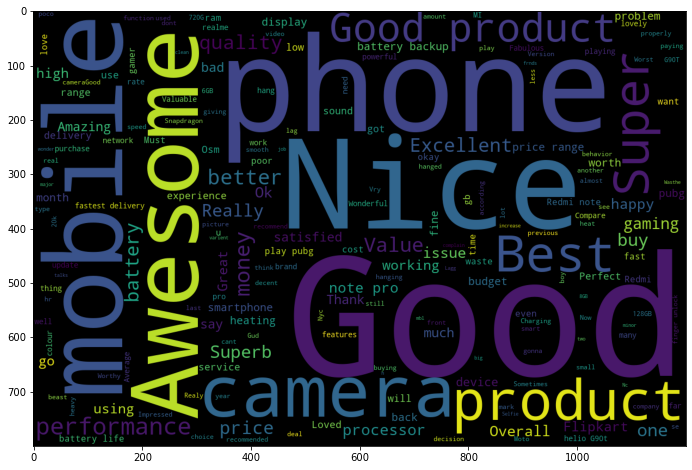

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(only_reviews_flipkart))
plt.show()

As per reviews, we get Redmi Note 8 Pro seems to be a Good Phone with Awesome Camera.

### CountVectorizer on Flipkart

In [ ]:
tf = CountVectorizer(token_pattern= "[A-Za-z']+", max_df= 0.6, min_df= 10, stop_words= STOPWORDS, ngram_range= (2,2))

In [ ]:
tf_mat = tf.fit_transform(df_f.Review)
tf_mat

<538x6 sparse matrix of type '<class 'numpy.int64'>'
	with 92 stored elements in Compressed Sparse Row format>

In [ ]:
tf_vocab = tf.vocabulary_

In [ ]:
word_freq = tf_mat.sum(axis = 0)

In [ ]:
word_freq_new = np.array(word_freq).reshape(tf_mat.shape[1],)

In [ ]:
np.array(tf_vocab)

array({'value money': 5, 'good product': 1, 'good phone': 0, 'nice phone': 3, 'nice product': 4, 'nice mobile': 2},
      dtype=object)

In [ ]:
word_freq_new

array([18, 27, 10, 10, 13, 16], dtype=int64)

In [ ]:
word_freq_dict = {}
for k,v in tf.vocabulary_.items():
    v = word_freq_new[v]
    word_freq_dict[k] = v

In [ ]:
word_freq_dict

{'value money': 16,
 'good product': 27,
 'good phone': 18,
 'nice phone': 10,
 'nice product': 13,
 'nice mobile': 10}

In [ ]:
word_freq_dict_sorted = {k: v for k , v in sorted(word_freq_dict.items(), key = lambda item: item[1], reverse= True)}

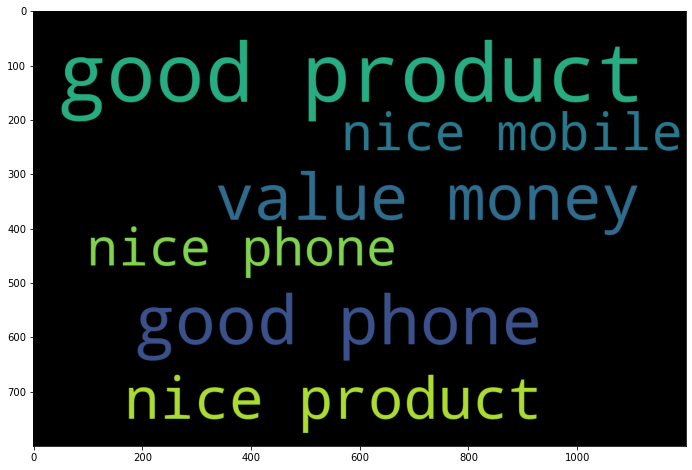

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_frequencies(word_freq_dict_sorted))

Above displayed words are the most used words in the reviews.

## Gensim

In [ ]:
df_f.head()

Comment Head  Rating         Review                Name      Place  \
0         Nice       3        Not bad  suraj cuncoliencar  North Goa   
1    Brilliant       5  Good products   Flipkart Customer  New Delhi   
2    Just wow!       5    Super phone   Flipkart Customer     Guntur   
3    Just okay       3           Nice   Flipkart Customer  New Delhi   
4    Wonderful       4          Good👍   Flipkart Customer      Lonar   

        Date       Mobile Name  
0  Nov, 2020  Redmi Note 8 Pro  
1  Nov, 2020  Redmi Note 8 Pro  
2  Nov, 2020  Redmi Note 8 Pro  
3  Nov, 2020  Redmi Note 8 Pro  
4  Nov, 2020  Redmi Note 8 Pro

In [ ]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim

In [ ]:
only_reviews_flipkart_gensim = df_f.Review

In [ ]:
only_reviewsF = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews_flipkart_gensim]

In [ ]:
only_reviewsF = [gensim.parsing.remove_stopwords(rev) for rev in only_reviewsF]

In [ ]:
tokens_f = [list(gensim.utils.tokenize(rev)) for rev in only_reviewsF]
tokens_f

[['bad'],
 ['good', 'products'],
 ['super', 'phone'],
 ['nice'],
 ['good'],
 ['wasthe', 'mobile', 'don', 't', 'frnds'],
 ['super', 'mobile', 'value', 'money', 'must', 'buy', 'it'],
 ['awesome'],
 ['nc'],
 ['lot',
  'better',
  'phone',
  'price',
  'range',
  'processor',
  'talks',
  'big',
  'camera',
  'decent',
  'superb',
  'can',
  't',
  'complain',
  'price',
  'range',
  'battery',
  'good',
  'display',
  'okay',
  'type',
  'great'],
 ['super', 'product'],
 ['good', 'product'],
 ['good'],
 ['good', 'product', 'need', 'increase', 'more'],
 ['nice', 'cameragood', 'gaming', 'processor'],
 ['nice'],
 ['excellent', 'phone', 'camera', 'wonder', 'updates'],
 ['super', 'good'],
 ['good'],
 ['good',
  'phone',
  'minor',
  'issue',
  'phone',
  'lagg',
  'major',
  'overall',
  'good',
  'phone'],
 ['nyc'],
 ['selfie', 'camera', 'clean'],
 ['good', 'product'],
 ['good', 'quality'],
 ['good', 'job'],
 ['awesome', 'mbl', 'n', 'camera', 'performance'],
 ['superb',
  'phone',
  'redmi',


In [ ]:
dictionaries_f = gensim.corpora.Dictionary(tokens_f)

In [ ]:
len(list(dictionaries_f))

528

In [ ]:
texts_f = tokens_f

In [ ]:
texts_f

[['bad'],
 ['good', 'products'],
 ['super', 'phone'],
 ['nice'],
 ['good'],
 ['wasthe', 'mobile', 'don', 't', 'frnds'],
 ['super', 'mobile', 'value', 'money', 'must', 'buy', 'it'],
 ['awesome'],
 ['nc'],
 ['lot',
  'better',
  'phone',
  'price',
  'range',
  'processor',
  'talks',
  'big',
  'camera',
  'decent',
  'superb',
  'can',
  't',
  'complain',
  'price',
  'range',
  'battery',
  'good',
  'display',
  'okay',
  'type',
  'great'],
 ['super', 'product'],
 ['good', 'product'],
 ['good'],
 ['good', 'product', 'need', 'increase', 'more'],
 ['nice', 'cameragood', 'gaming', 'processor'],
 ['nice'],
 ['excellent', 'phone', 'camera', 'wonder', 'updates'],
 ['super', 'good'],
 ['good'],
 ['good',
  'phone',
  'minor',
  'issue',
  'phone',
  'lagg',
  'major',
  'overall',
  'good',
  'phone'],
 ['nyc'],
 ['selfie', 'camera', 'clean'],
 ['good', 'product'],
 ['good', 'quality'],
 ['good', 'job'],
 ['awesome', 'mbl', 'n', 'camera', 'performance'],
 ['superb',
  'phone',
  'redmi',


In [ ]:
corpus_f = [dictionaries_f.doc2bow(text) for text in texts_f]

In [ ]:
lda_model_f = gensim.models.LdaMulticore(corpus=corpus_f,
                                           id2word=dictionaries_f,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=1000,
                                           passes=200,
                                           )

In [ ]:
lda_model_f.print_topics(num_topics= 8)

[(0,
  '0.058*"s" + 0.053*"it" + 0.017*"u" + 0.017*"osm" + 0.016*"camera" + 0.013*"smartphone" + 0.013*"play" + 0.013*"poor" + 0.013*"t" + 0.013*"processor"'),
 (1,
  '0.412*"good" + 0.129*"product" + 0.038*"excellent" + 0.016*"quality" + 0.012*"overall" + 0.012*"mobile" + 0.010*"loved" + 0.008*"battery" + 0.008*"service" + 0.008*"working"'),
 (2,
  '0.104*"super" + 0.058*"phone" + 0.042*"superb" + 0.038*"mobile" + 0.023*"bad" + 0.021*"camera" + 0.020*"flipkart" + 0.018*"t" + 0.014*"don" + 0.014*"delivery"'),
 (3,
  '0.089*"good" + 0.063*"performance" + 0.051*"camera" + 0.035*"price" + 0.034*"battery" + 0.028*"phone" + 0.028*"ok" + 0.020*"high" + 0.013*"processor" + 0.011*"overall"'),
 (4,
  '0.408*"nice" + 0.058*"product" + 0.028*"phone" + 0.023*"products" + 0.014*"working" + 0.014*"okay" + 0.010*"cost" + 0.010*"satisfied" + 0.010*"wonderful" + 0.010*"fabulous"'),
 (5,
  '0.046*"great" + 0.046*"amazing" + 0.033*"g" + 0.027*"love" + 0.026*"t" + 0.020*"better" + 0.020*"helio" + 0.017*"m

In [ ]:
from gensim import models
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_f.log_perplexity(corpus_f))  
# a measure of how good the model is. lower the better.


Perplexity:  -5.82461487023712


In [ ]:
# Compute Coherence Score
coherence_model_lda_f = CoherenceModel(model=lda_model_f, texts=tokens_f, dictionary=dictionaries_f, coherence='c_v')
coherence_lda_f = coherence_model_lda_f.get_coherence()
print('\nCoherence Score: ', coherence_lda_f)


Coherence Score:  0.4208095738185813


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [ ]:
visualize_flipkart = pyLDAvis.gensim_models.prepare(lda_model_f, corpus_f , dictionary=lda_model_f.id2word)
visualize_flipkart

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.078113 -0.131592       1        1  17.340313
6     -0.103463  0.008437       2        1  15.487260
1      0.296562 -0.011441       3        1  15.296389
2     -0.100636 -0.001803       4        1  14.842465
7     -0.049704  0.136477       5        1  12.765755
0     -0.077183 -0.140160       6        1  10.326994
4      0.034659  0.188520       7        1   7.856706
5     -0.078348 -0.048438       8        1   6.084118, topic_info=         Term        Freq       Total Category  logprob  loglift
1        good  153.000000  153.000000  Default  30.0000  30.0000
5        nice   64.000000   64.000000  Default  29.0000  29.0000
16    awesome   37.000000   37.000000  Default  28.0000  28.0000
35    product   53.000000   53.000000  Default  27.0000  27.0000
8      mobile   51.000000   51.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
123      want    0.861687    3.888631   Topic8  -4.9136   1.2926
206      poco    0.861653    2.388485   Topic8  -4.9137   1.7799
90   powerful    0.861649    3.200186   Topic8  -4.9137   1.4874
110   picture    0.861637    2.238762   Topic8  -4.9137   1.8446
34       type    0.861636    2.352963   Topic8  -4.9137   1.7949

[412 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
434       3  0.666968       able
342       1  0.811584  according
497       8  0.646477         ai
148       6  0.623162    alright
73        4  0.143806    amazing
...     ...       ...        ...
452       3  0.901826     worthy
293       1  0.616294     wouldn
440       3  0.666968      xaomi
476       5  0.644770       year
398       8  0.646478         yt

[465 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 2, 3, 8, 1, 5, 6])

## Sentiment Analysis

In [ ]:
#if rating is greater than 3 put 1 if rating is less than 3 put -1

In [ ]:
flipkart_Sentiment= df_f[df_f['Rating'] != 3]
flipkart_Sentiment['Sentiment'] = df_f['Rating'].apply(lambda rating : +1 if rating > 3 else -1)

C:\Users\kmpra\AppData\Local\Temp\ipykernel_9732\310883402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_Sentiment['Sentiment'] = df_f['Rating'].apply(lambda rating : +1 if rating > 3 else -1)


In [ ]:
flipkart_Sentiment

Comment Head  Rating  \
1                 Brilliant       5   
2                 Just wow!       5   
4                 Wonderful       4   
5    Worst experience ever!       1   
6            Simply awesome       5   
..                      ...     ...   
533         Worth the money       4   
534          Simply awesome       5   
535               Just wow!       5   
536        Perfect product!       5   
537             Good choice       4   

                                                Review                Name  \
1                                        Good products   Flipkart Customer   
2                                          Super phone   Flipkart Customer   
4                                                Good👍   Flipkart Customer   
5                     Wasthe Mobile don't but it frnds  tharun sriramagiri   
6            Super mobile.value for money.Must buy it.       Choudu  Metri   
..                                                 ...                 ...   
533                     Awesome product very satisfied           Raju Nath   
534                                               Nice       Pradeep Kumar   
535                                   Very nice👍 phone       Bharat  Singh   
536                                        Nice mobile     Ankit Chikanlar   
537  Nice but at this price there are more better p...  Venkatesh Belagapu   

                Place       Date       Mobile Name  Sentiment  
1           New Delhi  Nov, 2020  Redmi Note 8 Pro          1  
2              Guntur  Nov, 2020  Redmi Note 8 Pro          1  
4               Lonar  Nov, 2020  Redmi Note 8 Pro          1  
5          Kovurpalle  Nov, 2020  Redmi Note 8 Pro         -1  
6    Bijapur District  Nov, 2020  Redmi Note 8 Pro          1  
..                ...        ...               ...        ...  
533          Guwahati  Sep, 2020  Redmi Note 8 Pro          1  
534         Berhampur  Sep, 2020  Redmi Note 8 Pro          1  
535          Gurugram  Sep, 2020  Redmi Note 8 Pro          1  
536            Nagpur  Sep, 2020  Redmi Note 8 Pro          1  
537      Vizianagaram  Sep, 2020  Redmi Note 8 Pro          1  

[500 rows x 8 columns]

### Creating two dataframe with positive and negative sentiment

In [ ]:
positive_senti = flipkart_Sentiment[flipkart_Sentiment['Sentiment'] == 1]
negative_senti = flipkart_Sentiment[flipkart_Sentiment['Sentiment'] == -1]

In [ ]:
positive_senti

Comment Head  Rating  \
1            Brilliant       5   
2            Just wow!       5   
4            Wonderful       4   
6       Simply awesome       5   
7    Worth every penny       5   
..                 ...     ...   
533    Worth the money       4   
534     Simply awesome       5   
535          Just wow!       5   
536   Perfect product!       5   
537        Good choice       4   

                                                Review                Name  \
1                                        Good products   Flipkart Customer   
2                                          Super phone   Flipkart Customer   
4                                                Good👍   Flipkart Customer   
6            Super mobile.value for money.Must buy it.       Choudu  Metri   
7                                              Awesome       BALJIT  SINGH   
..                                                 ...                 ...   
533                     Awesome product very satisfied           Raju Nath   
534                                               Nice       Pradeep Kumar   
535                                   Very nice👍 phone       Bharat  Singh   
536                                        Nice mobile     Ankit Chikanlar   
537  Nice but at this price there are more better p...  Venkatesh Belagapu   

                Place       Date       Mobile Name  Sentiment  
1           New Delhi  Nov, 2020  Redmi Note 8 Pro          1  
2              Guntur  Nov, 2020  Redmi Note 8 Pro          1  
4               Lonar  Nov, 2020  Redmi Note 8 Pro          1  
6    Bijapur District  Nov, 2020  Redmi Note 8 Pro          1  
7           New Delhi  Nov, 2020  Redmi Note 8 Pro          1  
..                ...        ...               ...        ...  
533          Guwahati  Sep, 2020  Redmi Note 8 Pro          1  
534         Berhampur  Sep, 2020  Redmi Note 8 Pro          1  
535          Gurugram  Sep, 2020  Redmi Note 8 Pro          1  
536            Nagpur  Sep, 2020  Redmi Note 8 Pro          1  
537      Vizianagaram  Sep, 2020  Redmi Note 8 Pro          1  

[480 rows x 8 columns]

In [ ]:
negative_senti

Comment Head  Rating  \
5       Worst experience ever!       1   
77      Don't waste your money       1   
80                 Bad quality       2   
88      Worst experience ever!       1   
89         Could be way better       2   
104            Waste of money!       1   
127                  Very poor       1   
129            Useless product       1   
152                   Not good       2   
186  Did not meet expectations       1   
212                Expect more       2   
235                   Moderate       2   
259  Did not meet expectations       1   
313        Could be way better       2   
394            Waste of money!       1   
412            Waste of money!       1   
415  Expected a better product       2   
440                  Very poor       1   
512                   Moderate       2   
519     Not recommended at all       1   

                                                Review                  Name  \
5                     Wasthe Mobile don't but it frnds    tharun sriramagiri   
77   Very very bad experience with this phone don't...          Shahir Ahmad   
80   While switching space it lacks so much , it ta...        Suryansh Singh   
88   Don't buy this phone after update the mobile w...               Vivek S   
89   I have use this mobile since 5 month.Mobile is...       Yash Raj Sharma   
104                                        Not working     Flipkart Customer   
127                           Low network connectivity          Nandha Kumar   
129  Worst camera in this range.  Especially front ...        Labani  Biswas   
152  After using months I will say it is waste of m...     Flipkart Customer   
186  Product is already used.. display not working ...     Flipkart Customer   
212                                        Just ok....        JAISON  THOMAS   
235  I have another phone of Motorola of Moto G 5 w...         Rakesh Pathak   
259  not good,if any one want this mobile i am read...       Kuppaiah Gandla   
313  As per my decision it could be far better. Eve...          Rajeev Ghosh   
394  I havefacing much more issue with heating.cant...          Rizwan Islam   
412                                              Goods     mohd Shafiq Ahmed   
415                                  Very bad dont buy  Naishu  choithramani   
440  After using 1 year I am rating this mobile.I a...        Deepak Suvarna   
512           Got faulty product.service was very slow          wasim shaikh   
519               Waste phone suddenly hanged not open     Flipkart Customer   

                                Place       Date       Mobile Name  Sentiment  
5                          Kovurpalle  Nov, 2020  Redmi Note 8 Pro         -1  
77                          Kharagpur  Nov, 2020  Redmi Note 8 Pro         -1  
80                            Jaunpur  Nov, 2020  Redmi Note 8 Pro         -1  
88                 Thiruvananthapuram  Nov, 2020  Redmi Note 8 Pro         -1  
89                           Kolhapur  Nov, 2020  Redmi Note 8 Pro         -1  
104                           Isnapur  Nov, 2020  Redmi Note 8 Pro         -1  
127                           Chennai  Nov, 2020  Redmi Note 8 Pro         -1  
129                           Kolkata  Nov, 2020  Redmi Note 8 Pro         -1  
152                        Ahmadnagar  Nov, 2020  Redmi Note 8 Pro         -1  
186                         Bengaluru  Oct, 2020  Redmi Note 8 Pro         -1  
212                      Thoothukkudi  Oct, 2020  Redmi Note 8 Pro         -1  
235                  Giridih District  Oct, 2020  Redmi Note 8 Pro         -1  
259                         Hyderabad  Oct, 2020  Redmi Note 8 Pro         -1  
313                           Kolkata  Oct, 2020  Redmi Note 8 Pro         -1  
394  South Salmara Mankachar District  Oct, 2020  Redmi Note 8 Pro         -1  
412                            Bhilai  Oct, 2020  Redmi Note 8 Pro         -1  
415                             Thane  Oct, 2020  Redmi Note 8 Pro         -1  
440           

In [ ]:
negative_senti.shape

(20, 8)

C:\Users\kmpra\AppData\Local\Temp\ipykernel_9732\1839777679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_Sentiment['Sentiment'] = flipkart_Sentiment['Sentiment'].replace({-1 : 'negative_senti'})
C:\Users\kmpra\AppData\Local\Temp\ipykernel_9732\1839777679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_Sentiment['Sentiment'] = flipkart_Sentiment['Sentiment'].replace({1 : 'positive_senti'})
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following 

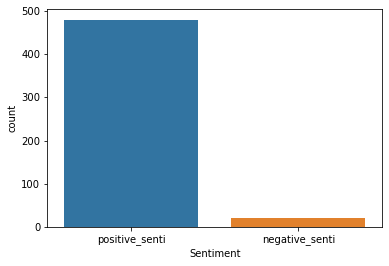

In [ ]:
flipkart_Sentiment['Sentiment'] = flipkart_Sentiment['Sentiment'].replace({-1 : 'negative_senti'})
flipkart_Sentiment['Sentiment'] = flipkart_Sentiment['Sentiment'].replace({1 : 'positive_senti'})
sns.countplot(flipkart_Sentiment["Sentiment"])
None

Out of total comment, 480 are positive and 20 are negetive

## Spacy

In [ ]:
pip install spaCy

  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import spacy
from spacy import displacy

In [ ]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
nlp = spacy.load('en_core_web_md')

In [ ]:
texts_flipkart = nlp(only_reviews_flipkart)

In [ ]:
for token in texts_flipkart:
  if token.orth_ == 'battery':
    print(" ".join(w.text for w in token.head.subtree))

battery is excellent.overall performance is good at this price segment .
battery life
Excellent battery camera capacity .
Good Cemara verry good Realy good Nice phone the real pro best gaming performance Camera best battery backup
Camera and battery
50   percent battery stills
If u need good battery but it 's pro max version or a good power bank ...
nice phone awesome camera awesome battery performance
long battery life and awesome cameras
It is nice processor.better battery backup.basically it is a gaming phone.if
best battery backup
display , battery
The battery back up is poor
good battery life
this battery will be Darin 20 % in stand by .
not least phone is good , nice camera , battery back up ...
battery performance


In [ ]:
for token in texts_flipkart:
    if token.dep_ == 'nsubj':
        print([w for w in token.subtree])

[Wasthe, Mobile]
[it]
[You]
[The, processor]
[Camera]
[you]
[Battery]
[Display]
[okay, type]
[camera]
[Nyc, Selfie, camera]
[This]
[This]
[I]
[Awesome, displayNo, hanging, issuesExcellent, camera]
[It]
[display]
[It]
[this, phone]
[Samsung]
[Ok,  , not, a, bad, Nice, Nice]
[I]
[Really, good, smartphone]
[Really, good, smartphone, Not, good, for, high, -, end, gaming.camera]
[battery]
[excellent.overall, performance]
[Good, mobile, Super, 🥰]
[it]
[This, smartphone]
[very, powerful, Chipset, Version, Gaming, play]
[I]
[Good, Cemara, verry, good, Realy, good, Nice, phone]
[It]
[This]
[🎮, phone, osm, Redmi]
[all]
[it]
[it]
[normalI]
[Good, mobile, Awesome, Good, phone]
[I]
[Mobile]
[Camera]
[Nice, mobile, phone]
[This]
[I]
[This, mobile]
[I]
[it]
[I]
[I]
[I]
[it]
[I]
[50,  , percent, battery, stills]
[I]
[I]
[it]
[it, company]
[it]
[competition]
[u]
[the, price, u]
[it]
[dimensties]
[Superb]
[it]
[Fine, Cool, Hangs]
[u]
[it]
[i]
[that]
[that]
[I]
[it]
[It]
[Camera]
[that]
[I]
[Its, camera,

In [ ]:
for chunk in texts_flipkart.noun_chunks:
    print(chunk)

Wasthe Mobile
it
Super mobile.value
money
it
Awesome Nc
You
a lot better phone
this price range
The processor
Camera
you
this price range
Battery
Display
okay type
Super product good product
Good Good product
Nice excellent phone
camera
a wonder
Super good good one Good phone minor issue
phone Lagg
a good phone
Nyc Selfie camera
This
very good product Good quality Good job
This
the Superb phone
Redmi
I
two varient
Note
pro
8GB 128GB
6GB 128 GB
Awesome displayNo
issuesExcellent camera
Note 9 Pro
It
display
It
this phone
Samsung
this mobile
Best Amazing phone
this Price Fabulous Nice phone
pubg
a bad Nice Nice
my phone Nice product
I
pubg
hdr
Really good smartphone
high-end gaming.camera
battery
excellent.overall performance
this price segment
Good mobile
battery life
One Super Awesome performance
Good Good
the amount
Excellent battery camera capacity
it
This smartphone
very powerful Chipset Version Gaming play
I
this product
Good Cemara verry
good Realy good Nice phone
Very good experie

In [ ]:
def ent_relation(txt):
    output = []
    doc_f = nlp(txt)
    for token in doc_f:
        if token.dep_ == 'nsubj':
            words_f = [w for w in token.head.rights]
            for wo in words_f:
                if wo.dep_ in ['acomp', 'amod']:
                    output.append((token.orth_, ' '.join([w.text for w in wo.subtree])))
    return output

In [ ]:
ent_relation(only_reviews_flipkart)

[('processor', 'big'),
 ('Camera', 'decent'),
 ('Battery', 'good'),
 ('type', 'great'),
 ('camera', 'clean'),
 ('display', 'good'),
 ('Samsung', 'better than this mobile'),
 ('good', 'good'),
 ('performance', 'good'),
 ('it', 'good'),
 ('play', 'very nice'),
 ('It', 'too good'),
 ('This', 'really appreciable'),
 ('I', 'happy'),
 ('mobile', 'exceptionally good'),
 ('I', 'unconvinced'),
 ('it', 'really good'),
 ('it', 'better'),
 ('It', 'really good'),
 ('Camera', 'excellent'),
 ('quality', 'awesome'),
 ('life', 'good'),
 ('processor', 'superb'),
 ('It', 'Good'),
 ('All', 'good'),
 ('camera', 'toooooo good 1'),
 ('Camera', 'too light I recommend you to buy it in the store than online'),
 ('cost', 'too high'),
 ('Super', 'very nice'),
 ('it', 'so nice'),
 ('MI', 'better smartphone'),
 ('I', 'happy with the finger unlock placement below the camera'),
 ('both', 'superb'),
 ('Battery', 'too good'),
 ('service', 'good'),
 ('phone', 'good'),
 ('mobile', 'best'),
 ('mobile', 'best'),
 ('photo',

# *********** Analysis on Amazon **********

In [ ]:
a_rating = []
a_review = []
a_tagline = []
a_name = []
a_place = []
a_date = []

In [ ]:
for i in range(1,51):
    url = "https://www.amazon.in/Redmi-Note-Pro-Electric-Processor/product-reviews/B07X3P1N3Q/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
    browser.get(url)
    containers = [x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH, "//div[@class='a-section review aok-relative']")]
    
    for container in containers:
        bsObj = BeautifulSoup(container)
        name_amazon = bsObj.find('div',{'class':"a-row a-spacing-mini"}).text
        review_amazon = bsObj.find('div', attrs = {'class':'a-row a-spacing-small review-data'}).text
        rating_amazon = bsObj.find('a',{'class':['a-link-normal']}).text
        tagline_amazon = bsObj.find('a',{'class':'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'}).text
        date_amazon = bsObj.find('span',{'class':'a-size-base a-color-secondary review-date'}).text
        
        date_amazon = re.sub('Reviewed in India 🇮🇳 on','',date_amazon)
        rating_amazon = re.sub('.0 out of 5 stars','',rating_amazon)
        tagline_amazon = re.sub('\n','',tagline_amazon)
        review_amazon = re.sub('\n','',review_amazon)
        
        a_name.append(name_amazon)
        a_date.append(date_amazon)
        a_review.append(review_amazon)
        a_rating.append(rating_amazon)
        a_tagline.append(tagline_amazon)
        pass 

In [ ]:
df_a = pd.DataFrame({'Comment Head':a_tagline,'Rating':a_rating,'Review':a_review,'Name':a_name,'Date':a_date})

In [ ]:
#Saving Reviews to a csv
#df_a.to_csv("kushagra_amazon.csv")

In [ ]:
df_a = pd.read_csv('kushagra_amazon.csv')

In [ ]:
df_a.head()

Unnamed: 0                                       Comment Head  Rating  \
0           0  A great budget phone for Manual Photography an...       4   
1           1                                               good       4   
2           2                              The Apple of Your Eye       5   
3           3                                             Better       4   
4           4                         Best phone for money range       4   

                                              Review           Name  \
0  Here's my full and honest review for those who...     Uday Singh   
1  product is very good i bought it just when it ...  Siddharth Das   
2  The Redmi Note series has always set the bar w...        pSyDuck   
3             I like design and I don't like 2mp cam          Ashok   
4          Good looks, good performance and durable.    Kk Sanodiya   

                 Date  
0     31 January 2020  
1    5 September 2022  
2    13 December 2019  
3   22 September 2022  
4   16 September 2022

In [ ]:
df_a.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_a.shape

(500, 5)

In [ ]:
df_a.head()

Comment Head  Rating  \
0  A great budget phone for Manual Photography an...       4   
1                                               good       4   
2                              The Apple of Your Eye       5   
3                                             Better       4   
4                         Best phone for money range       4   

                                              Review           Name  \
0  Here's my full and honest review for those who...     Uday Singh   
1  product is very good i bought it just when it ...  Siddharth Das   
2  The Redmi Note series has always set the bar w...        pSyDuck   
3             I like design and I don't like 2mp cam          Ashok   
4          Good looks, good performance and durable.    Kk Sanodiya   

                 Date  
0     31 January 2020  
1    5 September 2022  
2    13 December 2019  
3   22 September 2022  
4   16 September 2022

In [ ]:
duplicate = df_a[df_a.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Comment Head, Rating, Review, Name, Date]
Index: []

In [ ]:
df_a['Mobile Name'] = 'Redmi Note 8 Pro'

In [ ]:
df_a.head()

Comment Head  Rating  \
0  A great budget phone for Manual Photography an...       4   
1                                               good       4   
2                              The Apple of Your Eye       5   
3                                             Better       4   
4                         Best phone for money range       4   

                                              Review           Name  \
0  Here's my full and honest review for those who...     Uday Singh   
1  product is very good i bought it just when it ...  Siddharth Das   
2  The Redmi Note series has always set the bar w...        pSyDuck   
3             I like design and I don't like 2mp cam          Ashok   
4          Good looks, good performance and durable.    Kk Sanodiya   

                 Date       Mobile Name  
0     31 January 2020  Redmi Note 8 Pro  
1    5 September 2022  Redmi Note 8 Pro  
2    13 December 2019  Redmi Note 8 Pro  
3   22 September 2022  Redmi Note 8 Pro  
4   16 September 2022  Redmi Note 8 Pro

In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comment Head  500 non-null    object
 1   Rating        500 non-null    int64 
 2   Review        497 non-null    object
 3   Name          500 non-null    object
 4   Date          500 non-null    object
 5   Mobile Name   500 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.6+ KB


In [ ]:
df_a.describe()

Rating
count  500.00000
mean     4.34400
std      0.62164
min      1.00000
25%      4.00000
50%      4.00000
75%      5.00000
max      5.00000

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

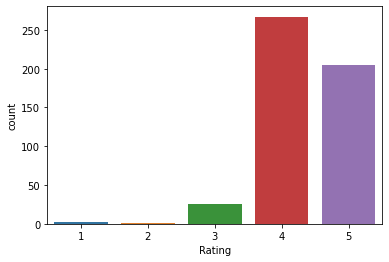

In [ ]:
sns.countplot(df_a['Rating'])

In Amazon, most users have given 4 star rating.

In [ ]:
df_a['Date'] = pd.to_datetime(df_a['Date'])

In [ ]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Comment Head  500 non-null    object        
 1   Rating        500 non-null    int64         
 2   Review        500 non-null    object        
 3   Name          500 non-null    object        
 4   Date          500 non-null    datetime64[ns]
 5   Mobile Name   500 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 23.6+ KB


In [ ]:
df_a["Year"] = df_a["Date"].dt.year

In [ ]:
df_a["Month"] = df_a["Date"].dt.month

<AxesSubplot:xlabel='Month,Year'>

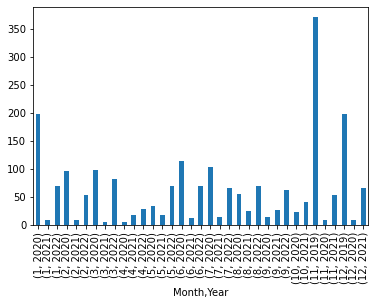

In [ ]:
month_year_purchase = df_a.groupby(["Month", "Year"])["Rating"].sum()
month_year_purchase.plot.bar()

November, 2019 being the highest as most people has rated in this month.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


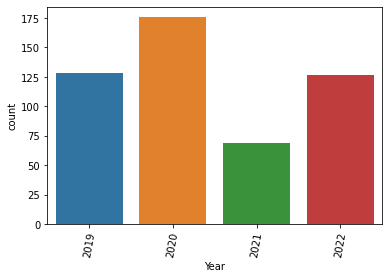

In [ ]:
date_count = sns.countplot(df_a['Year'])
date_count.set_xticklabels(date_count.get_xticklabels(), rotation=80)
None

In Year 2020, People have reviewed a lot

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


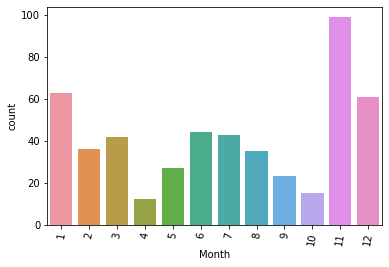

In [ ]:
date_count = sns.countplot(df_a['Month'])
date_count.set_xticklabels(date_count.get_xticklabels(), rotation=80)
None

In [ ]:
df_a.isnull().sum()

Comment Head    0
Rating          0
Review          3
Name            0
Date            0
Mobile Name     0
dtype: int64

## WordCloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
def convert_to_number(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
df_a = df_a.replace(to_replace = np.nan, value = 'No Review')

In [ ]:
only_reviews_amazon = " ".join(df_a.Review)

In [ ]:
only_reviews_amazon

'Here\'s my full and honest review for those who wanna buy it:It\'s kind of hard to get the features it gives in such a small price range. It surpasses most phones in similar price range, for following reasons:1. The CPU. Even though it uses Mediatek chip (which is cheap and inferior to Snapdragons), it runs all of its 8 cores on stable 2GHz, not like others which have 2 cores running at 2.5GHz and rest of the 6 are at 1.5. Better buy the 8GB RAM version to get the most out of it, because This Mediatek chip somehow performs at par (or even better) than Snapdragon processors that come within the similar price range. However, it doesn\'t always run at full speed, but only when needed. This gives some problems like occasional lags when quickly opening high-memory apps while phone is in calm mode for too long.2. Liquid cooled: Again, for this price range it\'s amazing. However, you need to keep the phone covered with plastic case (comes in the box) to make it work flawlessly. It\'s because

In [ ]:
wc = WordCloud(width = 1200, height= 800, stopwords= STOPWORDS)

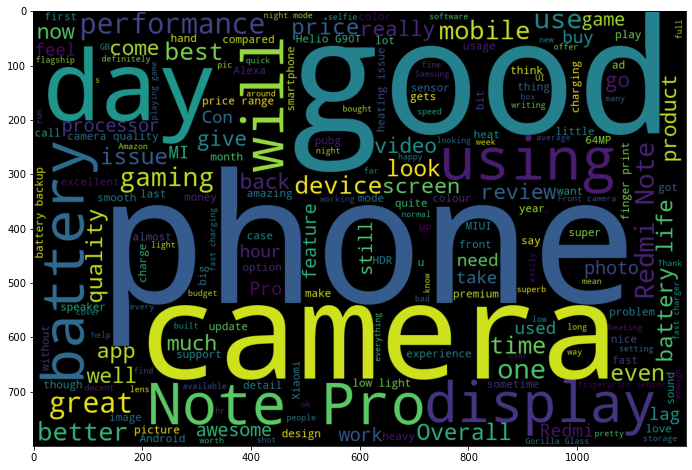

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(only_reviews_amazon))
plt.show()

In [ ]:
only_heading_amazon = " ".join(df_a['Comment Head'])

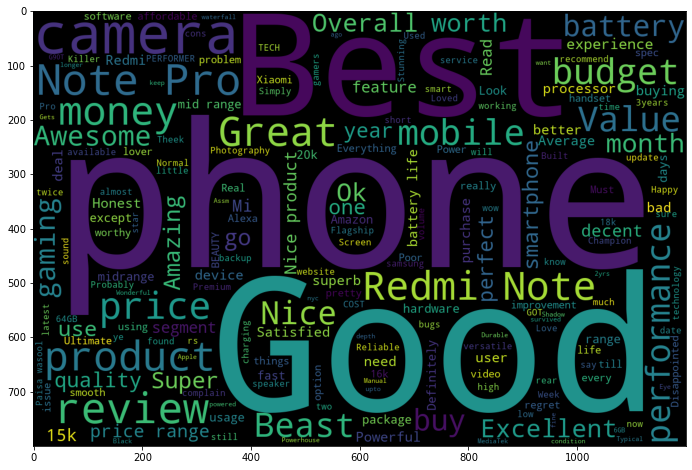

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_text(only_heading_amazon))
plt.show()

## Count_vectorizer

In [ ]:
tf = CountVectorizer(token_pattern= "[a-z']+", max_df= 0.95, min_df=0.02, stop_words= STOPWORDS)

In [ ]:
tf_mat = tf.fit_transform(df_a.Review)
tf_mat

<500x593 sparse matrix of type '<class 'numpy.int64'>'
	with 19050 stored elements in Compressed Sparse Row format>

In [ ]:
tf_vocab = tf.vocabulary_

In [ ]:
word_freq = tf_mat.sum(axis = 0)

In [ ]:
word_freq_new = np.array(word_freq).reshape(tf_mat.shape[1],)

In [ ]:
np.array(tf_vocab)

array({'full': 178, 'review': 440, 'buy': 57, 'hard': 211, 'features': 159, 'gives': 193, 'small': 484, 'price': 395, 'range': 422, 'phones': 370, 'similar': 477, 'even': 143, 'though': 520, 'mediatek': 302, 'runs': 446, 'others': 356, 'running': 445, 'rest': 439, 'better': 38, 'gb': 187, 'ram': 421, 'version': 550, 'performs': 367, 'snapdragon': 488, 'come': 82, 'within': 575, 'always': 12, 'run': 444, 'speed': 496, 'problems': 401, 'lags': 257, 'quickly': 419, 'high': 225, 'memory': 304, 'apps': 23, 'phone': 369, 'mode': 314, 'long': 275, 'liquid': 272, 'amazing': 13, 'need': 329, 'keep': 253, 'case': 68, 'comes': 83, 'box': 46, 'make': 291, 'work': 577, 'heat': 216, 'hands': 209, 'easily': 136, 'inside': 241, 'cool': 98, 'using': 545, 'cover': 101, 'helps': 224, 'multiple': 323, 'g': 181, 'good': 198, 'never': 333, 'people': 363, 'single': 479, 'although': 11, 'online': 351, 'gaming': 185, 'big': 39, 'everything': 145, 'wifi': 572, 'works': 579, 'way': 563, 'large': 258, 'battery': 

In [ ]:
word_freq_new

array([ 11,  12,  11,  19,  11,  11,  53,  17,  67,  47,  10,  26,  21,
        74,  46,  55,  14,  56,  22,  13,  23,  17,  47,  77,  40,  10,
        17,  31,  35,  92, 127,  58,  33,  10, 426,  28,  14, 167, 168,
        55,  92,  14,  16,  15,  15,  40,  42,  15,  12,  18,  19,  49,
        47,  43,  10,  21,  12,  84,  16,  18,  48,  13,  13,  17, 713,
        44,  14,  33,  42,  79,  75,  11, 100,  18,  33,  10,  11,  12,
        33,  16,  35,  18,  24,  74,  19,  16,  10,  49,  10,  11,  17,
        14,  11,  73,  19,  13,  12,  15,  28,  28,  14,  44,  18,  17,
        12,  15,  27,  12, 185,  13,  99,  19,  11,  47,  14,  15,  36,
        18,  13,  76,  34, 122,  13,  15,  16,  13,  15, 229,  17,  24,
        10,  11,  16,  18,  13,  12,  38,  16,  14,  22,  36,  14,  26,
       135,  41,  30,  59,  14,  20,  18,  68,  17,  53,  20,  11,  32,
       180,  23,  35,  60,  64,  19,  12,  37,  54,  55,  93,  56,  11,
        10,  24,  13,  14,  27,  42,  26,  18,  86,  69,  12,  1

In [ ]:
word_freq_dict = {}
for k,v in tf.vocabulary_.items():
    v = word_freq_new[v]
    word_freq_dict[k] = v

In [ ]:
word_freq_dict

{'full': 69,
 'review': 103,
 'buy': 84,
 'hard': 11,
 'features': 60,
 'gives': 44,
 'small': 18,
 'price': 203,
 'range': 114,
 'phones': 96,
 'similar': 13,
 'even': 135,
 'though': 65,
 'mediatek': 57,
 'runs': 20,
 'others': 11,
 'running': 18,
 'rest': 14,
 'better': 168,
 'gb': 124,
 'ram': 71,
 'version': 12,
 'performs': 11,
 'snapdragon': 22,
 'come': 24,
 'within': 16,
 'always': 21,
 'run': 18,
 'speed': 50,
 'problems': 18,
 'lags': 29,
 'quickly': 16,
 'high': 79,
 'memory': 19,
 'apps': 77,
 'phone': 828,
 'mode': 130,
 'long': 44,
 'liquid': 35,
 'amazing': 74,
 'need': 65,
 'keep': 18,
 'case': 42,
 'comes': 74,
 'box': 42,
 'make': 39,
 'work': 51,
 'heat': 42,
 'hands': 21,
 'easily': 38,
 'inside': 13,
 'cool': 28,
 'using': 209,
 'cover': 44,
 'helps': 17,
 'multiple': 18,
 'g': 112,
 'good': 751,
 'never': 27,
 'people': 39,
 'single': 31,
 'although': 26,
 'online': 14,
 'gaming': 178,
 'big': 55,
 'everything': 30,
 'wifi': 26,
 'works': 82,
 'way': 26,
 'large'

In [ ]:
word_freq_dict_sorted = {k: v for k , v in sorted(word_freq_dict.items(), key = lambda item: item[1], reverse= True)}

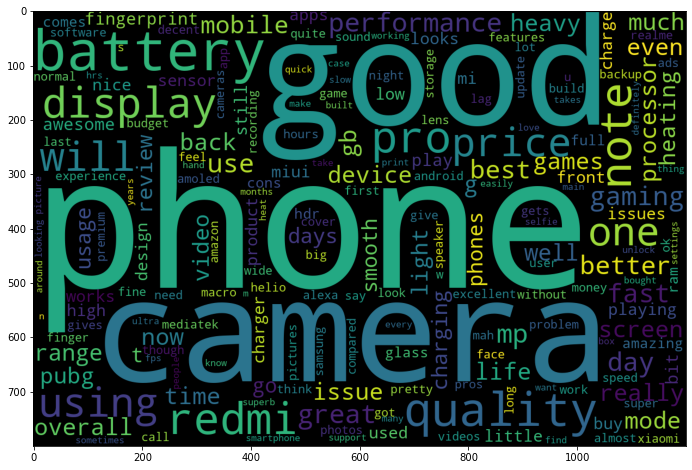

In [ ]:
plt.figure(figsize= (12,8))
plt.imshow(wc.generate_from_frequencies(word_freq_dict_sorted))

Wordcloud also displays the main focused word as good, phone, camera, quality.

## Gensim

In [ ]:
df_a.head()

Comment Head  Rating  \
0  A great budget phone for Manual Photography an...       4   
1                                               good       4   
2                              The Apple of Your Eye       5   
3                                             Better       4   
4                         Best phone for money range       4   

                                              Review           Name  \
0  Here's my full and honest review for those who...     Uday Singh   
1  product is very good i bought it just when it ...  Siddharth Das   
2  The Redmi Note series has always set the bar w...        pSyDuck   
3             I like design and I don't like 2mp cam          Ashok   
4          Good looks, good performance and durable.    Kk Sanodiya   

        Date       Mobile Name  Year  Month  
0 2020-01-31  Redmi Note 8 Pro  2020      1  
1 2022-09-05  Redmi Note 8 Pro  2022      9  
2 2019-12-13  Redmi Note 8 Pro  2019     12  
3 2022-09-22  Redmi Note 8 Pro  2022      9  
4 2022-09-16  Redmi Note 8 Pro  2022      9

In [ ]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import gensim

In [ ]:
only_reviews_amazon_gensim = df_a.Review

In [ ]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews_amazon_gensim]

In [ ]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [ ]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['here',
  's',
  'honest',
  'review',
  'wanna',
  'buy',
  'it',
  'it',
  's',
  'kind',
  'hard',
  'features',
  'gives',
  'small',
  'price',
  'range',
  'surpasses',
  'phones',
  'similar',
  'price',
  'range',
  'following',
  'reasons',
  'cpu',
  'uses',
  'mediatek',
  'chip',
  'which',
  'cheap',
  'inferior',
  'snapdragons',
  'runs',
  'cores',
  'stable',
  'ghz',
  'like',
  'cores',
  'running',
  'ghz',
  'rest',
  'better',
  'buy',
  'gb',
  'ram',
  'version',
  'it',
  'mediatek',
  'chip',
  'performs',
  'par',
  'or',
  'better',
  'snapdragon',
  'processors',
  'come',
  'similar',
  'price',
  'range',
  'however',
  'doesn',
  't',
  'run',
  'speed',
  'needed',
  'gives',
  'problems',
  'like',
  'occasional',
  'lags',
  'quickly',
  'opening',
  'high',
  'memory',
  'apps',
  'phone',
  'calm',
  'mode',
  'long',
  'liquid',
  'cooled',
  'again',
  'price',
  'range',
  'it',
  's',
  'amazing',
  'however',
  'need',
  'phone',
  'covered',

In [ ]:
dictionaries = gensim.corpora.Dictionary(tokens)

In [ ]:
len(list(dictionaries))

4442

In [ ]:
texts = tokens

In [ ]:
texts

[['here',
  's',
  'honest',
  'review',
  'wanna',
  'buy',
  'it',
  'it',
  's',
  'kind',
  'hard',
  'features',
  'gives',
  'small',
  'price',
  'range',
  'surpasses',
  'phones',
  'similar',
  'price',
  'range',
  'following',
  'reasons',
  'cpu',
  'uses',
  'mediatek',
  'chip',
  'which',
  'cheap',
  'inferior',
  'snapdragons',
  'runs',
  'cores',
  'stable',
  'ghz',
  'like',
  'cores',
  'running',
  'ghz',
  'rest',
  'better',
  'buy',
  'gb',
  'ram',
  'version',
  'it',
  'mediatek',
  'chip',
  'performs',
  'par',
  'or',
  'better',
  'snapdragon',
  'processors',
  'come',
  'similar',
  'price',
  'range',
  'however',
  'doesn',
  't',
  'run',
  'speed',
  'needed',
  'gives',
  'problems',
  'like',
  'occasional',
  'lags',
  'quickly',
  'opening',
  'high',
  'memory',
  'apps',
  'phone',
  'calm',
  'mode',
  'long',
  'liquid',
  'cooled',
  'again',
  'price',
  'range',
  'it',
  's',
  'amazing',
  'however',
  'need',
  'phone',
  'covered',

In [ ]:
corpus = [dictionaries.doc2bow(text) for text in texts]

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionaries,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=1000,
                                           passes=200,
                                           )

In [ ]:
lda_model.print_topics(num_topics= 8)

[(0,
  '0.026*"good" + 0.016*"i" + 0.014*"camera" + 0.013*"mobile" + 0.012*"phone" + 0.012*"quality" + 0.010*"m" + 0.009*"price" + 0.007*"s" + 0.007*"it"'),
 (1,
  '0.019*"camera" + 0.013*"good" + 0.011*"battery" + 0.010*"display" + 0.009*"phone" + 0.008*"performance" + 0.008*"pro" + 0.007*"gaming" + 0.007*"mode" + 0.007*"t"'),
 (2,
  '0.007*"mb" + 0.005*"kb" + 0.005*"tho" + 0.004*"jio" + 0.004*"airtel" + 0.004*"voda" + 0.004*"batteries" + 0.004*"phone" + 0.004*"went" + 0.003*"high"'),
 (3,
  '0.020*"s" + 0.019*"t" + 0.018*"phone" + 0.015*"it" + 0.009*"camera" + 0.009*"pro" + 0.008*"good" + 0.008*"note" + 0.007*"redmi" + 0.007*"like"'),
 (4,
  '0.043*"good" + 0.014*"mobile" + 0.012*"phone" + 0.012*"camera" + 0.011*"product" + 0.011*"nice" + 0.008*"hei" + 0.007*"mp" + 0.006*"battery" + 0.005*"bhi"'),
 (5,
  '0.031*"phone" + 0.026*"good" + 0.022*"camera" + 0.015*"battery" + 0.015*"it" + 0.013*"s" + 0.012*"t" + 0.011*"quality" + 0.008*"like" + 0.007*"day"'),
 (6,
  '0.022*"camera" + 0.016

In [ ]:
from gensim import models
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.


Perplexity:  -7.256337979676102


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionaries, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2929391457910546


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus , dictionary=lda_model.id2word)
vis

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.165111 -0.026244       1        1  54.464809
6     -0.085551 -0.004710       2        1  13.690843
3     -0.009232  0.132621       3        1   9.534585
1     -0.071812 -0.057792       4        1   8.014143
7      0.006279  0.085184       5        1   6.390137
0     -0.003206 -0.048885       6        1   4.145079
4      0.122946 -0.098347       7        1   2.802628
2      0.205688  0.018172       8        1   0.957776, topic_info=           Term        Freq       Total Category  logprob  loglift
148        good  677.000000  677.000000  Default  30.0000  30.0000
49       camera  656.000000  656.000000  Default  29.0000  29.0000
828      mobile  133.000000  133.000000  Default  28.0000  28.0000
267       phone  772.000000  772.000000  Default  27.0000  27.0000
310           s  368.000000  368.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1756        off    0.607005    5.465952   Topic8  -6.2904   2.4506
3         again    0.717877   13.608530   Topic8  -6.1227   1.7062
453         try    0.683164   10.678575   Topic8  -6.1722   1.8991
298   recording    0.842321   39.529104   Topic8  -5.9628   0.7997
267       phone    1.230416  772.673576   Topic8  -5.5838  -1.7942

[618 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3349      7  0.493169          ab
3551      4  0.415854    absolute
3551      5  0.415854    absolute
455       4  0.415816  acceptable
455       5  0.415816  acceptable
...     ...       ...         ...
417       3  0.302714         you
417       4  0.053420         you
417       5  0.053420         you
417       6  0.017807         you
904       3  0.796013         yrs

[1192 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 4, 2, 8, 1, 5, 3])

According to above analysis, Total 8 topics were created. This phone and Battery performance is good and quality of camera is great. Phone, Camera, good is talked about in every topic.

## Sentiment Analysis

In [ ]:
amazon_sentiment= df_a[df_a['Rating'] != 3]
amazon_sentiment['Sentiment'] = df_a['Rating'].apply(lambda rating : +1 if rating > 3 else -1)

C:\Users\kmpra\AppData\Local\Temp\ipykernel_9732\2519184993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_sentiment['Sentiment'] = df_a['Rating'].apply(lambda rating : +1 if rating > 3 else -1)


In [ ]:
amazon_sentiment

Comment Head  Rating  \
0    A great budget phone for Manual Photography an...       4   
1                                                 good       4   
2                                The Apple of Your Eye       5   
3                                               Better       4   
4                           Best phone for money range       4   
..                                                 ...     ...   
494                  Under 15k is totally worth it...!       5   
495                                    Excellent phone       4   
497     Phone is very good and battery is awesome too.       5   
498       Beast performance but not that beast overall       4   
499                                    EXCELLENT PHONE       5   

                                                Review           Name  \
0    Here's my full and honest review for those who...     Uday Singh   
1    product is very good i bought it just when it ...  Siddharth Das   
2    The Redmi Note series has always set the bar w...        pSyDuck   
3               I like design and I don't like 2mp cam          Ashok   
4            Good looks, good performance and durable.    Kk Sanodiya   
..                                                 ...            ...   
494  All said and done, Redmi Note 8 Pro is an impr...       Jatin ✔️   
495  The phone is very good and one of the best pho...          Mogul   
497  Pros::- The phone has quite smooth scrolling a...       Customer   
498  The performance of this phone is unmatched wit...  Hormazd Patel   
499  EXCELLENT PHONE I'M TELLING IT AFTER USING IT ...   Ronit Barman   

          Date       Mobile Name  Year  Month  Sentiment  
0   2020-01-31  Redmi Note 8 Pro  2020      1          1  
1   2022-09-05  Redmi Note 8 Pro  2022      9          1  
2   2019-12-13  Redmi Note 8 Pro  2019     12          1  
3   2022-09-22  Redmi Note 8 Pro  2022      9          1  
4   2022-09-16  Redmi Note 8 Pro  2022      9          1  
..         ...               ...   ...    ...        ...  
494 2020-01-16  Redmi Note 8 Pro  2020      1          1  
495 2020-07-30  Redmi Note 8 Pro  2020      7          1  
497 2020-09-15  Redmi Note 8 Pro  2020      9          1  
498 2020-06-17  Redmi Note 8 Pro  2020      6          1  
499 2022-01-27  Redmi Note 8 Pro  2022      1          1  

[475 rows x 9 columns]

In [ ]:
positive_a = amazon_sentiment[amazon_sentiment['Sentiment'] == 1]
negative_a = amazon_sentiment[amazon_sentiment['Sentiment'] == -1]

In [ ]:
positive_a.shape

(472, 9)

In [ ]:
negative_a.shape

(3, 9)

C:\Users\kmpra\AppData\Local\Temp\ipykernel_9732\4137841224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_sentiment['Sentiment'] = amazon_sentiment['Sentiment'].replace({-1 : 'negative_a'})
C:\Users\kmpra\AppData\Local\Temp\ipykernel_9732\4137841224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_sentiment['Sentiment'] = amazon_sentiment['Sentiment'].replace({1 : 'positive_a'})
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a ke

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

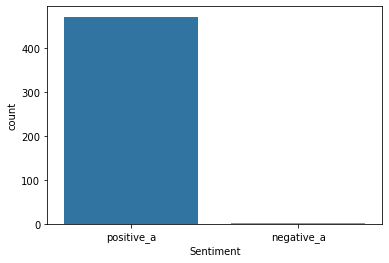

In [ ]:
amazon_sentiment['Sentiment'] = amazon_sentiment['Sentiment'].replace({-1 : 'negative_a'})
amazon_sentiment['Sentiment'] = amazon_sentiment['Sentiment'].replace({1 : 'positive_a'})
sns.countplot(amazon_sentiment["Sentiment"])

Out of total comment, 472 are positive and 3 are negetive

## Spacy

In [ ]:
texts_amazon = nlp(only_reviews_amazon)

In [ ]:
for token in texts_amazon:
  if token.orth_ == 'battery':
    print(" ".join(w.text for w in token.head.subtree))

Large battery , Out - of - Box Fast Charger and USB type C : Again , for a phone this cheap , it 's a steal .
fast CPU and large battery
while keeping the battery running for long
battery - saving
with good battery and smooth performance
that after just few months battery was not able to hold the charge like it did at the start
the battery life
battery efficiency.*Performance & Specs
5/5*The 4500 mah battery eeks
battery backup and camera quality
battery drain .. BATTERY   -  
Battery : 4500 mAh battery works perfectly .
a decent battery life considering 6.5 inch display and a a heavy processorcamera?-
good camera good battery good
Redmi Note 8 Pro Specifications:6.53 - inch full HD+ ( 1080p ) display | MediaTek G90 T octa - core processor | 6 GB or 8 GB RAM with 64 GB or 128 GB storage with expandable storage support up to 512 GB |   64MP main camera + 8MP ultra - wide + 2MP macro + 2MP depth camera + 20MP camera | 4500 mAh battery with 18W fast charging | MIUI 10 with Android Pie ( 9

In [ ]:
for token in texts_amazon:
    if token.dep_ == 'nsubj':
        print([w for w in token.subtree])

[my, full, and, honest, review, for, those, who, wanna, buy, it]
[who]
[It]
[it]
[It]
[it]
[which]
[it]
[which]
[This, Mediatek, chip]
[that]
[it]
[This]
[phone]
[Liquid]
[it]
[you]
[it]
[It]
[that]
[Multiple, Antennae, :]
[The, 3G/4, G, cellular, reception, on, this, phone]
[you]
[most, people]
[who]
[it]
[Wifi, /, Hotspot]
[it]
[Battery]
[they]
[the, way, this, phone, handles]
[this, phone]
[everything]
[that]
[phone]
[that]
[those, lags]
[you]
[your, other, option, for, total, zero, lag, free, experience]
[Apple]
[that]
[This, phone]
[most, of, them]
[the, main, reasons, to, buy, this]
[The, color, /, contrast, you, get, in, the, final, clicked, picture, of, 16MP, that, combines, the, data, from, multiple, sensors]
[you]
[that]
[this]
[you]
[MacroLens]
[you]
[You]
[it]
[what]
[what]
[manual, controls]
[shutter, speed]
[very, limited, and, final, pictures]
[the, camera, app]
[other, apps, like, CameraFV-5]
[proshot]
[you]
[you]
[which]
[All, sensors]
[which]
[it]
[they, all]
[the, ma

In [ ]:
for chunk in texts_amazon.noun_chunks:
    print(chunk)

my full and honest review
those
who
it
It
the features
it
such a small price range
It
most phones
similar price range
reasons:1
The CPU
it
Mediatek chip
which
Snapdragons
it
all
its 8 cores
others
which
2 cores
rest
the 8GB RAM version
it
This Mediatek chip
par
Snapdragon processors
that
the similar price range
it
full speed
This
some problems
occasional lags
high-memory apps
phone
calm mode
too long.2
Liquid
this price range
it
you
the phone
plastic case
the box
it
It
the heat
your hands
the inside fluid
convection currents
that
the phone
a plastic cover
it.3
Multiple Antennae
The 3G/4G cellular reception
this phone
you
signal
the areas
most people
a single bar
it
gamers
who
stable connection
online gaming
it
a big boon
everything
Wifi/Hotspot
any other phone.4
Box
a phone
it
a steal
Battery
they
this phone
fast CPU
large battery
the way
this phone
everything
that
you
smooth experience
the battery
some noticeable glitches
phone
a while
battery-saving
full performing mode
that
lags
tho

In [ ]:
def ent_relation(txt):
    output = []
    doc_a = nlp(txt)
    for token in doc_a:
        if token.dep_ == 'nsubj':
            words_a = [w for w in token.head.rights]
            for wo in words_a:
                if wo.dep_ in ['acomp', 'amod']:
                    output.append((token.orth_, ' '.join([w.text for w in wo.subtree])))
    return output

In [ ]:
ent_relation(only_reviews_amazon)

[('It', 'kind of hard'),
 ('which', 'cheap and inferior to Snapdragons'),
 ('it', 'amazing'),
 ('Antennae',
  "so good that you 're practically never out of signal in the areas where most people struggle to get a single bar"),
 ('reception',
  "so good that you 're practically never out of signal in the areas where most people struggle to get a single bar"),
 ('way', 'very efficient'),
 ('everything', 'very efficient'),
 ('lags', 'uncommon'),
 ('most', 'necessary'),
 ('contrast', 'unmatched'),
 ('this', 'unmatched'),
 ('pictures', 'very blurry'),
 ('app', 'native to Redmi software'),
 ('which', 'useless for night'),
 ('sensors',
  'larger than usual phone sensors , which means better details in low light in all modes'),
 ('it', 'native'),
 ('it', 'so fake and ugly'),
 ('lens', 'very practical'),
 ('they', 'practical'),
 ('they', 'good'),
 ('64MP', 'any good'),
 ('which', 'kinda better than most expensive phones can do'),
 ('lighting', 'good and subject'),
 ('which', 'fast'),
 ('price',

According to above analysis, Photos captured from the phone is very good. The Price is cheap.